# Figures:

From bioRxiv v. 1:
Figs 3D-E, 4B-C; S6C,E-F

# Cells to run

## Set up

In [1]:
import numpy as np
import pandas as pd
import sys, copy, time
import itertools as it

sys.path.extend(['../', '../../../'])
import trkd_roi_analysis as tra
import trkd_roi_plotting as trp

from analysis import session
from util import gen_util, plot_util, file_util, math_util

from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
"""
Initialization
"""

# path to data directory
datadir = '/home/jay/Dropbox/research/yu/dendrites/new-dff-and-data'
# name for mouse_df
mouse_df_fnm = '/home/jay/Dropbox/research/yu/dendrites/' + \
    'eyes/custom-dendrites-aibs-code/OpenScope_CA_Analysis-main/mouse_df.csv'

# obtain mouse_df and mouse numbers, both full and only those with data for sessions 1 through 3
mouse_df, mouse_ns_full, mouse_ns_sess_123 = tra.set_up_mouse_info(mouse_df_fnm)

# General parameters for functions
stimtype_list = ['gabors', 'bricks']
brk_dir = 'any'
# op = 'discr'
op = 'd-prime'
only_matched_rois = True
scale = True
remnans = False
sess_ns = [1,2,3]
mouse_ns = mouse_ns_sess_123

sel_sess_ns = [1,2]
stim_sess = list(it.product(stimtype_list, sel_sess_ns))

err='bstrap'
err_bar='std'
# surp_ns_metric = 'diff'
# surp_ns_metric = 'discr'
surp_ns_metric = 'd-prime'

All mice:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Mice with all of sessions 1-3 : [ 1  3  4  6  7  8  9 10 11 12 13]


In [3]:
# Remove mice 12, 13 for now until get new data up and running
mouse_ns = mouse_ns[:-2]
mouse_ns

array([ 1,  3,  4,  6,  7,  8,  9, 10, 11])

## Indiv. ROI USI evolution
Figs 3D (Gabors), S6C (visual flow)

### Generate dataframes

In [4]:
for stimtype in stimtype_list:
    tracked_roi_usi_df = \
        tra.make_usi_df(stimtype, mouse_df, mouse_df_fnm, mouse_ns, datadir, 
                        brk_dir=brk_dir,
                        op=op, 
                        only_matched_rois=only_matched_rois, 
                        scale=scale, 
                        remnans=remnans,
                        sess_ns=sess_ns)
    if stimtype=='gabors':
        gab__tracked_roi_usi_df = tracked_roi_usi_df
    elif stimtype=='bricks':
        brk__tracked_roi_usi_df = tracked_roi_usi_df    

Mouse  1 , sess  1
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
unexp_data.shape =  (58, 94)
8.39 sec
Mouse  1 , sess  2
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
unexp_data.shape =  (58, 90)
16.10 sec
Mouse  1 , sess  3
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
unexp_data.shape =  (58, 105)
25.05 sec
Mouse  3 , sess  1
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
unexp_data.shape =  (55, 97)
33.11 sec
Mouse  3 , sess  2
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
unexp_data.shape =  (55, 99)
41.31 sec
Mouse  3 , sess  3
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
unexp_data.shape =  (55, 99)
48.98 sec
Mouse  4 , sess  1
Loading stimulus and alignment info...
Creating stimulus objects...
L

Creating stimulus objects...
Loading ROI trace info...
unexp_data.shape =  (11, 31)
102.21 sec
Mouse  7 , sess  3
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
unexp_data.shape =  (11, 30)
104.49 sec
Mouse  8 , sess  1
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
unexp_data.shape =  (27, 32)
113.26 sec
Mouse  8 , sess  2
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
unexp_data.shape =  (27, 29)
120.14 sec
Mouse  8 , sess  3
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
unexp_data.shape =  (27, 32)
128.01 sec
Mouse  9 , sess  1
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
unexp_data.shape =  (21, 34)
155.99 sec
Mouse  9 , sess  2
Loading stimulus and alignment info...
Creating stimulus objects...
Loading ROI trace info...
unexp_data.shape =  (21, 33

### Write dataframes as .h5 files

In [5]:
"""
Make variable (and maybe file) name
"""

for stimtype in stimtype_list:
    if stimtype=='gabors':
        df_fnm = '../data/gab--tracked-roi-usis-df.h5'
        gab__tracked_roi_usi_df.to_hdf(df_fnm, 'data')
    elif stimtype=='bricks':
        df_fnm = '../data/brk--tracked-roi-usis-df.h5'
        brk__tracked_roi_usi_df.to_hdf(df_fnm, 'data')        
    print(df_fnm)

../data/gab--tracked-roi-usis-df.h5
../data/brk--tracked-roi-usis-df.h5


/home/jay/anaconda3/envs/osca/lib/python3.6/site-packages/pandas/core/generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['mouse_n', 'layer', 'compartment', 'sess_1_usi', 'sess_2_usi',
       'sess_3_usi', 'sess_1_expec_evnt_mn', 'sess_2_expec_evnt_mn',
       'sess_3_expec_evnt_mn', 'sess_1_expec_evnt_std',
       'sess_2_expec_evnt_std', 'sess_3_expec_evnt_std',
       'sess_1_unexp_evnt_mn', 'sess_2_unexp_evnt_mn', 'sess_3_unexp_evnt_mn',
       'sess_1_unexp_evnt_std', 'sess_2_unexp_evnt_std',
       'sess_3_unexp_evnt_std'],
      dtype='object')]

  encoding=encoding,


### Load dataframes

In [6]:
for stimtype in stimtype_list:
    if stimtype=='gabors':
        df_fnm = '../data/gab--tracked-roi-usis-df.h5'
        gab__tracked_roi_usi_df = pd.read_hdf(df_fnm)
    elif stimtype=='bricks':
        df_fnm = '../data/brk--tracked-roi-usis-df.h5'
        brk__tracked_roi_usi_df = pd.read_hdf(df_fnm)        
    print(df_fnm)

../data/gab--tracked-roi-usis-df.h5
../data/brk--tracked-roi-usis-df.h5


### Plot
Figs 3D (Gabors), S6C (visual flow)

#### In-notebook

Bricks
L2/3 dend
L5 dend
L2/3 soma
L5 soma
Gabors
L2/3 dend
L5 dend
L2/3 soma
L5 soma


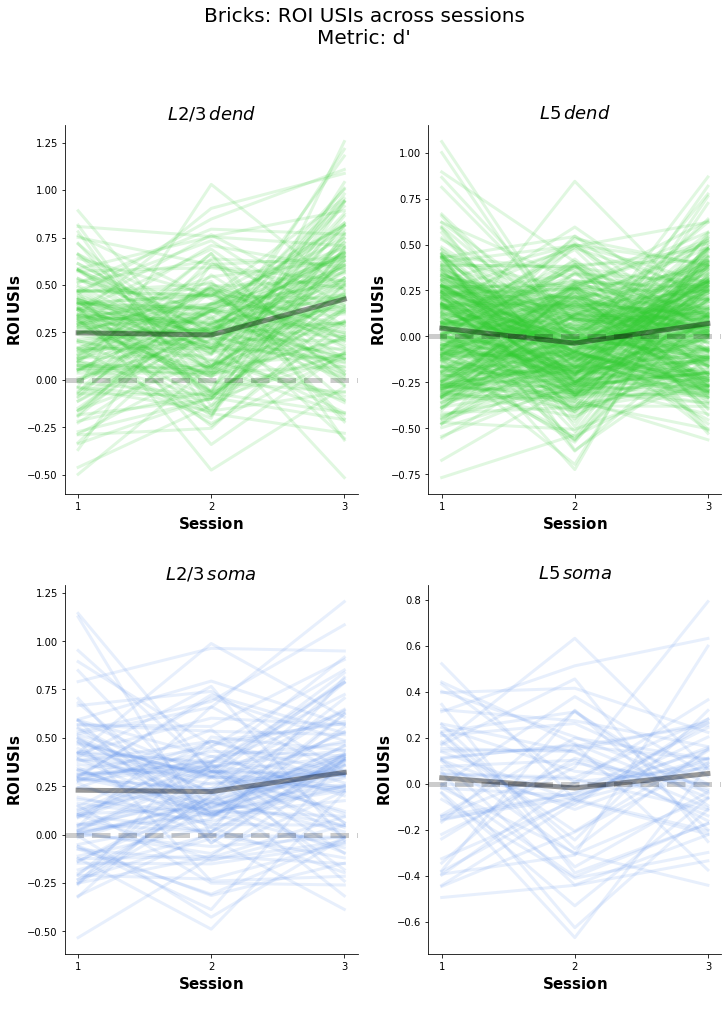

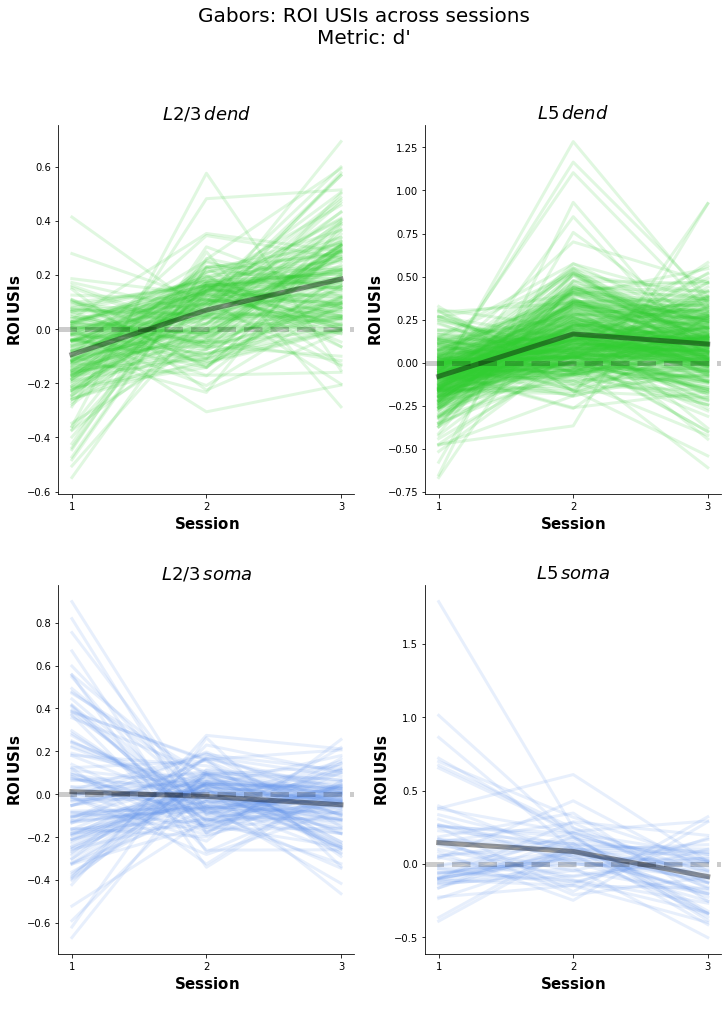

In [7]:
alpha_plot=0.15
alpha_hline=0.2
alpha_mean=0.4

fig, ax = trp.plot_usis_over_sessions(brk__tracked_roi_usi_df, 'bricks', 
                                      alpha_plot=alpha_plot, alpha_hline=alpha_hline,
                                      alpha_mean=alpha_mean)
fig, ax = trp.plot_usis_over_sessions(gab__tracked_roi_usi_df, 'gabors', 
                                      alpha_plot=alpha_plot, alpha_hline=alpha_hline,
                                      alpha_mean=alpha_mean)


#### As PDF

In [8]:
pdf_fnm = '../plots/tracked-roi-usis.pdf'

alpha_plot=0.15
alpha_hline=0.2
alpha_mean=0.4

with PdfPages(pdf_fnm) as pdf:
    fig, ax = trp.plot_usis_over_sessions(brk__tracked_roi_usi_df, 'bricks', 
                                          alpha_plot=alpha_plot, alpha_hline=alpha_hline,
                                          alpha_mean=alpha_mean)
    pdf.savefig()
    plt.close()
    fig, ax = trp.plot_usis_over_sessions(gab__tracked_roi_usi_df, 'gabors', 
                                          alpha_plot=alpha_plot, alpha_hline=alpha_hline,
                                          alpha_mean=alpha_mean)
    pdf.savefig()
    plt.close()

Bricks
L2/3 dend
L5 dend
L2/3 soma
L5 soma
Gabors
L2/3 dend
L5 dend
L2/3 soma
L5 soma


## |USI| mean

Fig 3E (Gabors)
\+ visual flow, which is not a figure.

However, I actually think it should be a figure, in part since we have it for the Gabors, but mainly because (1) it again visually shows greater coupling between dend/soma and (2) because we compare the fractional changes of both Gabors and visual flow in S6E

### Plot

#### In-notebook

Bricks
L2/3 dend
L5 dend
L2/3 soma
L5 soma
Gabors
L2/3 dend
L5 dend
L2/3 soma
L5 soma


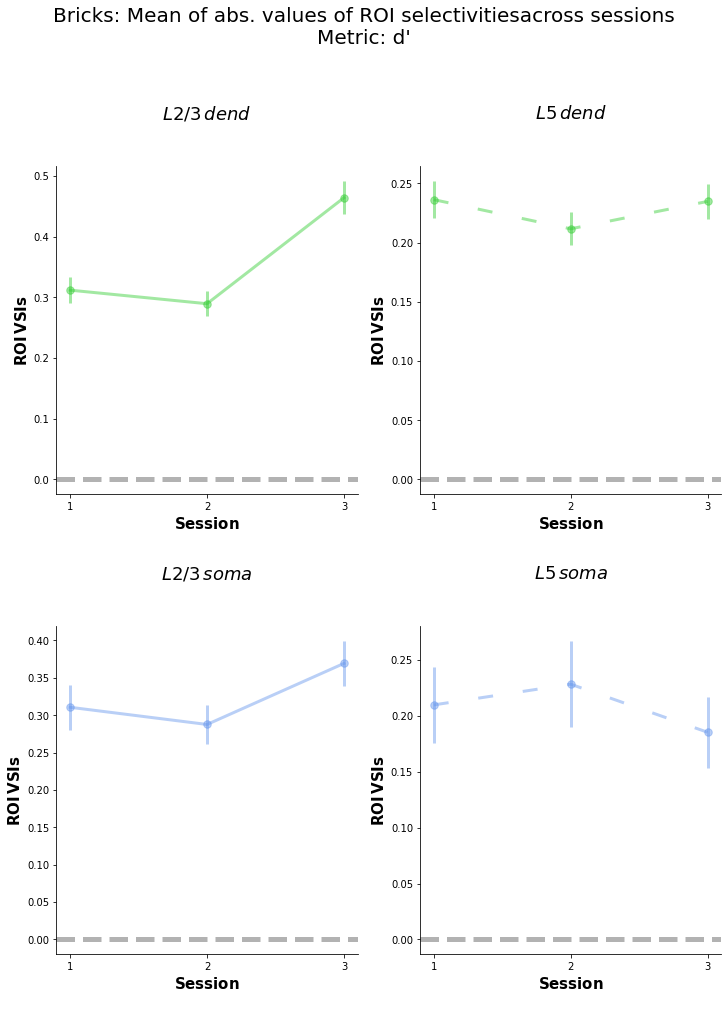

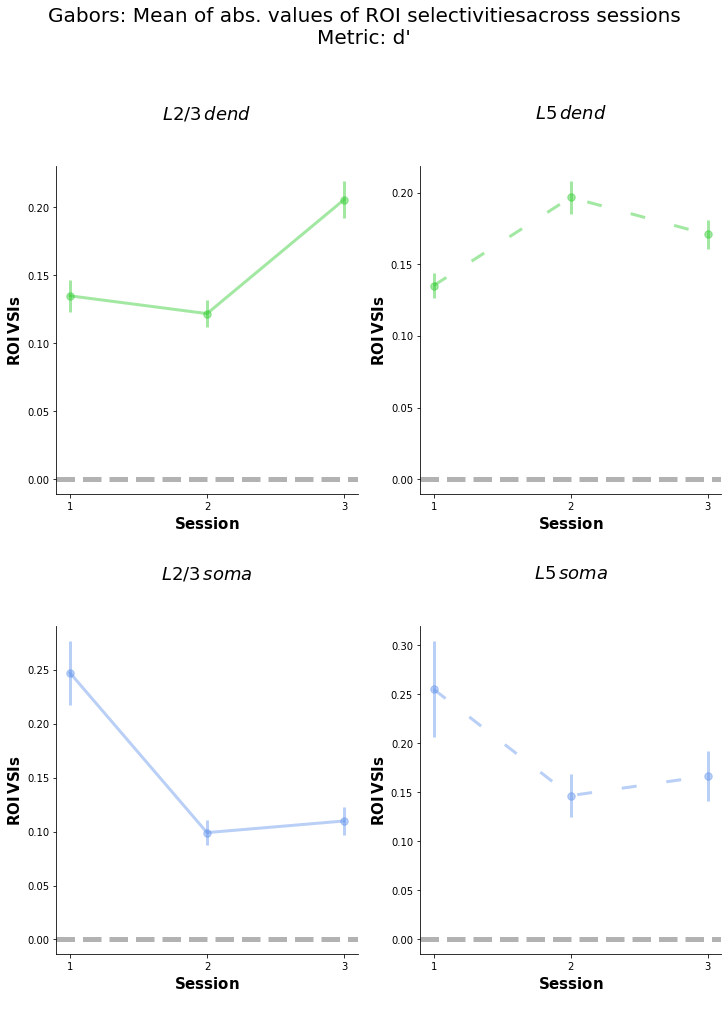

In [9]:
alpha_plot=0.45
alpha_hline=0.3

fig, ax = trp.plot_mean_abs_usis_over_sessions(brk__tracked_roi_usi_df, 'bricks', 
                                               alpha_plot=alpha_plot, alpha_hline=alpha_hline)
fig, ax = trp.plot_mean_abs_usis_over_sessions(gab__tracked_roi_usi_df, 'gabors', 
                                               alpha_plot=alpha_plot, alpha_hline=alpha_hline)

#### As PDF

In [10]:
pdf_fnm = '../plots/tracked-mean-abs-usis.pdf'

alpha_plot=0.45
alpha_hline=0.3

with PdfPages(pdf_fnm) as pdf:
    fig, ax = trp.plot_mean_abs_usis_over_sessions(brk__tracked_roi_usi_df, 'bricks', 
                                                   alpha_plot=alpha_plot, alpha_hline=alpha_hline)
    pdf.savefig()
    plt.close()
    
    fig, ax = trp.plot_mean_abs_usis_over_sessions(gab__tracked_roi_usi_df, 'gabors', 
                                               alpha_plot=alpha_plot, alpha_hline=alpha_hline)
    pdf.savefig()
    plt.close()

Bricks
L2/3 dend
L5 dend
L2/3 soma
L5 soma
Gabors
L2/3 dend
L5 dend
L2/3 soma
L5 soma


### Compute p-values

In [11]:
%%time
# n_perm = 1e3
n_perm = 1e5
tracked_mean_abs_usi_df = tra.make_usi_abs_mean_df(gab__tracked_roi_usi_df, brk__tracked_roi_usi_df, 
                                                   stimtype_list, n_perm)

L2/3 dend
L5 dend
L2/3 soma
L5 soma
L2/3 dend
L5 dend
L2/3 soma
L5 soma
CPU times: user 6min 16s, sys: 109 ms, total: 6min 16s
Wall time: 6min 16s


In [12]:
tracked_mean_abs_usi_df

,layer,compartment,stimtype,usi_abs_mn_1,usi_abs_mn_2,usi_abs_mn_3,usi_abs_mn_raw_p__1_2,usi_abs_mn_raw_p__2_3,usi_abs_mn_raw_p__1_3,usi_sig_for_abs_mn__1_2,usi_sig_for_abs_mn__2_3,usi_sig_for_abs_mn__1_3
0,L2/3,dend,gabors,0.134995,0.121941,0.205646,0.33542,0.00000,0.00000,False,<= 0.001,<= 0.001
1,L5,dend,gabors,0.135234,0.196691,0.170862,0.00000,0.01472,0.00102,<= 0.001,False,<= 0.05
2,L2/3,soma,gabors,0.246758,0.098981,0.109737,0.00000,0.60152,0.00000,<= 0.001,False,<= 0.001
3,L5,soma,gabors,0.255082,0.146682,0.166830,0.00238,0.60908,0.01546,<= 0.05,False,False
4,L2/3,dend,bricks,0.311839,0.289490,0.464024,0.41406,0.00000,0.00000,False,<= 0.001,<= 0.001
5,L5,dend,bricks,0.236275,0.211630,0.234761,0.04574,0.06482,0.90316,False,False,False
6,L2/3,soma,bricks,0.310458,0.287488,0.369086,0.39330,0.00254,0.02876,False,<= 0.05,False
7,L5,soma,bricks,0.209604,0.228132,0.185191,0.53772,0.15382,0.42390,False,False,False


### Write dataframe as .h5 file

In [13]:
tracked_mean_abs_usi_df.to_hdf('../data/tracked-usi-mean-abs-intersession-permutation-comparison.h5', 'data')

### Load dataframe

In [14]:
tracked_mean_abs_usi_df = \
    pd.read_hdf('../data/tracked-usi-mean-abs-intersession-permutation-comparison.h5')

## USI abs. fractional changes from sess 1 to 3

Fig S6E

In [15]:
%%time

# n_perm=1e2
# n_perm=1e3
# n_perm=1e4
n_perm=1e5
# n_bstrap=1e2
# n_bstrap=1e3
n_bstrap=1e4

usi_abs_frac_chng_df = tra.make_usi_abs_frac_chng_df(gab__tracked_roi_usi_df, brk__tracked_roi_usi_df, 
                                                     n_perm, n_bstrap)

L2/3 dend
L2/3 soma
L5 dend
L5 soma
all all
CPU times: user 11min 46s, sys: 90.8 ms, total: 11min 47s
Wall time: 11min 47s


### Write dataframe as .h5 file

In [16]:
usi_abs_frac_chng_df.to_hdf('../data/usi-abs-frac-chng_df.h5', 'data')

/home/jay/anaconda3/envs/osca/lib/python3.6/site-packages/pandas/core/generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['layer', 'compartment', 'sess_compare', 'gab_mn_abs_frac_chng',
       'brk_mn_abs_frac_chng'],
      dtype='object')]

  encoding=encoding,


### Load dataframe

In [17]:
usi_abs_frac_chng_df = pd.read_hdf('../data/usi-abs-frac-chng_df.h5')

### Plot
Fig S6E

#### In-notebook

L2/3 dend
L5 dend
L2/3 soma
L5 soma
all all


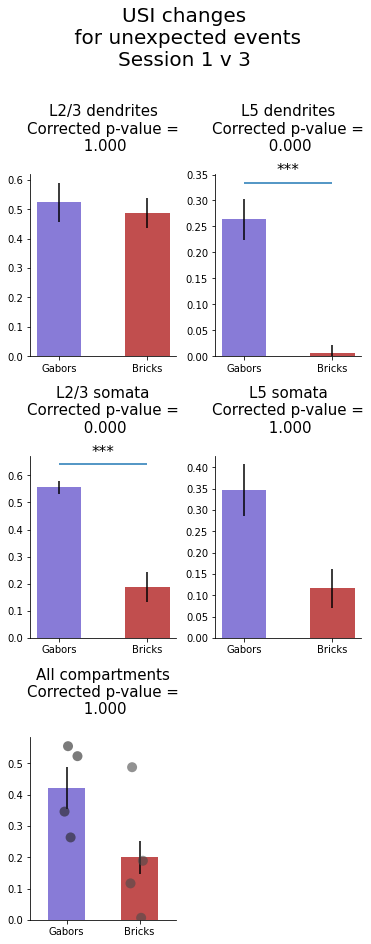

In [18]:
fig = trp.plot_usi_abs_frac_chng(usi_abs_frac_chng_df, bonf_n=5)

#### As PDF

In [19]:
pdf_fnm = '../plots/usi-abs-frac-chng.pdf'

with PdfPages(pdf_fnm) as pdf:
    fig = trp.plot_usi_abs_frac_chng(usi_abs_frac_chng_df, bonf_n=5)
    pdf.savefig()
    plt.close()

L2/3 dend
L5 dend
L2/3 soma
L5 soma
all all


## Correlations
Figs 4B-C (Gabors), S6F (visual flow)

In [20]:
%%time 

# n_perm = 1e2
# n_perm = 1e3
# n_perm = 1e4
n_perm = 1e5
# n_bstrap = 1e2
n_bstrap = 1e4

usi_corr_df = \
    pd.DataFrame(columns=['stimtype', 'layer', 'compartment', 'usi_base_sess', 
                          'corr_raw', 'corr_resid', 'corr_resid_low_sd', 'corr_resid_high_sd', 
                          'corr_resid_null_low_ci', 'corr_resid_null_high_ci',
                          'p_val_raw', 'sig_correc', 'usi', 'delta_usi', 
                          'corr_raw_distro', 'bstrap_raw_distro']) 
for i, (stimtype, sess) in enumerate(stim_sess):
    print(i, stimtype, sess)
    if stimtype == 'gabors':
        tracked_roi_usi_df = gab__tracked_roi_usi_df
    elif stimtype == 'bricks':
        tracked_roi_usi_df = brk__tracked_roi_usi_df
    usi_corr_df = tra.make_usi_corr_df(tracked_roi_usi_df, usi_corr_df, stimtype,
                                       usi_base_sess=sess, n_perm=n_perm, n_bstrap=n_bstrap)

0 gabors 1
dend L2/3
soma L2/3
dend L5
soma L5
1 gabors 2
dend L2/3
soma L2/3
dend L5
soma L5
2 bricks 1
dend L2/3
soma L2/3
dend L5
soma L5
3 bricks 2
dend L2/3
soma L2/3
dend L5
soma L5
CPU times: user 12min 12s, sys: 63.2 ms, total: 12min 12s
Wall time: 12min 12s


In [21]:
usi_corr_df

,stimtype,layer,compartment,usi_base_sess,corr_raw,corr_resid,corr_resid_low_sd,corr_resid_high_sd,corr_resid_null_low_ci,corr_resid_null_high_ci,p_val_raw,sig_correc,usi,delta_usi,corr_raw_distro,bstrap_raw_distro
0,gabors,L2/3,dend,1,-0.828089,-0.230233,-0.340368,-0.120098,-0.303187,0.052364,0.06934,False,"[-0.20948865724055873, -0.07799209178215337, -...","[0.25101808958540606, 0.23669927141273267, 0.0...","[-0.7586050453652675, -0.791365743751795, -0.7...","[-0.853517865628692, -0.8334937401686701, -0.8..."
1,gabors,L2/3,soma,1,-0.954282,-0.837816,-0.868109,-0.807523,-0.410882,0.095181,0.00000,<= 0.001,"[-0.08543578814539718, -0.19080372916770008, 0...","[-0.052339889681226826, 0.2923089291796721, -0...","[-0.69477508849612, -0.7856617221631865, -0.77...","[-0.9585659287750886, -0.952256792677446, -0.9..."
2,gabors,L5,dend,1,-0.698163,0.029979,0.007386,0.052572,-0.252786,0.048092,0.10706,False,"[-0.1460789208637054, 0.03387987995245824, -0....","[0.16655585292011726, -0.19013815803104783, 0....","[-0.7601487432892745, -0.7501722944770213, -0....","[-0.7284985671897809, -0.7514182984948048, -0...."
3,gabors,L5,soma,1,-0.898368,-0.666628,-0.838018,-0.495239,-0.631776,0.217390,0.00466,<= 0.05,"[0.2672096920510191, 0.33594455493421804, 0.15...","[-0.24791275996756984, -0.22577231397196446, 0...","[-0.8576704644148803, -0.5507191165725761, -0....","[-0.8967207641053072, -0.9297973636526973, -0...."
4,gabors,L2/3,dend,2,-0.562097,0.120689,0.086559,0.154819,-0.301341,0.053151,0.00000,<= 0.001,"[0.041529432344847315, 0.15870717963057931, -0...","[-0.011409971866580305, 0.050601257904476366, ...","[-0.8077543641306063, -0.7953920701902306, -0....","[-0.5239339935708218, -0.5748702486773518, -0...."
5,gabors,L2/3,soma,2,-0.695035,0.013630,-0.016725,0.043984,-0.409005,0.096162,0.68876,False,"[-0.137775677826624, 0.10150520001197202, -0.1...","[0.35536920869746474, -0.15918728305184165, 0....","[-0.7263760090124081, -0.7401224208178285, -0....","[-0.7521905232439475, -0.663296440236667, -0.7..."
6,gabors,L5,dend,2,-0.654881,0.054712,0.031645,0.077780,-0.254777,0.047709,0.00464,<= 0.05,"[0.02047693205641185, -0.1562582780785896, -0....","[-0.0025872881419453583, 0.4160609369662915, 1...","[-0.759236444089441, -0.7729240770186397, -0.7...","[-0.6643713152792069, -0.6825940168541628, -0...."
7,gabors,L5,soma,2,-0.672619,0.012914,-0.031182,0.057009,-0.633041,0.216186,0.90736,False,"[0.01929693208344925, 0.11017224096225359, 0.2...","[-0.11770228355996659, -0.3355235941586949, -0...","[-0.7859924209682263, -0.7735219389647863, -0....","[-0.5801623631908235, -0.6718772821525579, -0...."
8,bricks,L2/3,dend,1,-0.685033,-0.014646,-0.140986,0.111695,-0.258072,0.063653,0.89908,False,"[-0.2889831824130035, -0.46025785557679383, -0...","[0.03394340799968426, 0.32590588131696246, 0.6...","[-0.6827365830136375, -0.6555055974747523, -0....","[-0.6144874556223918, -0.732608044385657, -0.7..."
9,bricks,L2/3,soma,1,-0.633423,-0.194058,-0.349469,-0.038647,-0.306310,0.115332,0.13384,False,"[0.0005797690163049459, 0.18200715937910175, 0...","[-0.061868702551224015, -0.07679432442565284, ...","[-0.4682392631690334, -0.5637856850600742, -0....","[-0.605639057781252, -0.6093446825522107, -0.6..."


### Write dataframe as .h5 file

In [22]:
usi_corr_df.to_hdf('../data/usi-corr-df.h5', 'data')

/home/jay/anaconda3/envs/osca/lib/python3.6/site-packages/pandas/core/generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['stimtype', 'layer', 'compartment', 'usi_base_sess', 'sig_correc',
       'usi', 'delta_usi', 'corr_raw_distro', 'bstrap_raw_distro'],
      dtype='object')]

  encoding=encoding,


### Load dataframe

In [23]:
usi_corr_df = pd.read_hdf('../data/usi-corr-df.h5')

### Plot
Figs 4C (Gabors), S6F (visual flow)

#### In-notebook

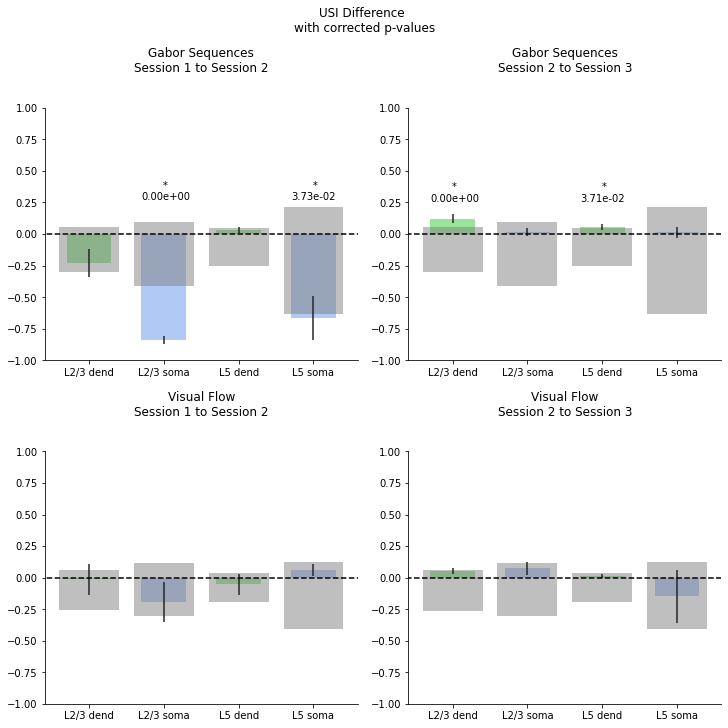

In [24]:
fig = trp.plot_usi_corr(usi_corr_df, stim_sess)

#### As PDF

In [25]:
pdf_fnm = '../plots/usi-correlations.pdf'

with PdfPages(pdf_fnm) as pdf:
    fig = trp.plot_usi_corr(usi_corr_df, stim_sess)
    pdf.savefig()
    plt.close()

### Obtain data from correlation nearest median of shuffled distro
Fig 4B

In [26]:
from importlib import reload
reload(tra)
reload(trp)
corr_perm = tra.usi_corr_permutation(gab__tracked_roi_usi_df, 'gab', 'L2/3', 'soma', usi_base_sess=1)

L2/3 soma
Corr raw, median =  -0.9542822025877825 -0.7177483046158473


#### Write data

In [27]:
np.save('../data/corr-perm-of-median-of-shuffled-distro--l23-soma-gabors.npy', corr_perm)

#### Load data

In [28]:
corr_perm = np.load('../data/corr-perm-of-median-of-shuffled-distro--l23-soma-gabors.npy')

### Plot
Fig 4B

#### In-notebook

CPU times: user 246 ms, sys: 8.03 ms, total: 254 ms
Wall time: 243 ms


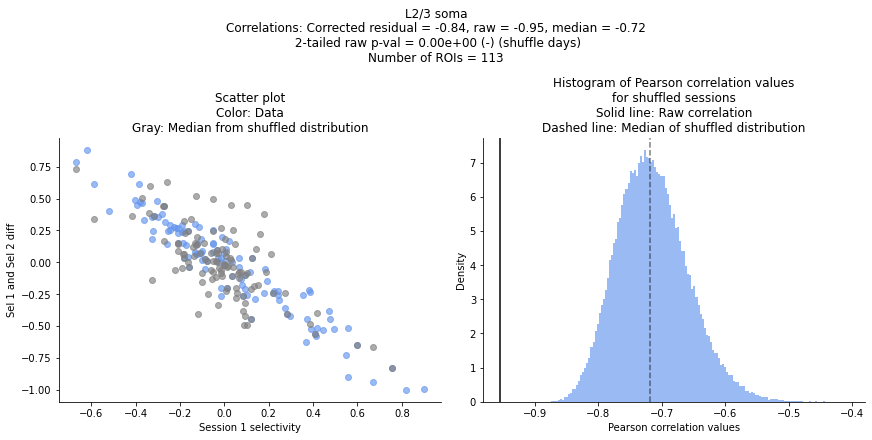

In [29]:
%%time
_ = trp.plot_corr_scatt_hist_perm(usi_corr_df, corr_perm, 'gabors', layer='L2/3', compartment='soma', 
                                  usi_base_sess=1)

#### As PDF

In [30]:
%%time
pdf_fnm = '../plots/corr-permutation-from-median-of-shuffled-distro--l23-soma-gabors.pdf'
print(pdf_fnm)
with PdfPages(pdf_fnm) as pdf:
    trp.plot_corr_scatt_hist_perm(usi_corr_df, corr_perm, 'gabors', layer='L2/3', compartment='soma', 
                                  usi_base_sess=1)
    pdf.savefig()
    plt.close()

../plots/corr-permutation-from-median-of-shuffled-distro--l23-soma-gabors.pdf
CPU times: user 939 ms, sys: 140 ms, total: 1.08 s
Wall time: 829 ms
